In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from hmmlearn import hmm
import joblib
import seaborn as sns
import networkx as nx


In [18]:
# the use of Git LFS for the data

X_Behav_Novel_Object = pd.pandas.read_csv("../data/etho/Behav_Novel_Object.csv")
X_Behav_Novel_Object = pd.DataFrame(X_Behav_Novel_Object).drop(['Frames'], axis=1)
X_Behav_Novel_Object = X_Behav_Novel_Object.values 


X_Behav_Unrelated_to_Object = pd.pandas.read_csv("../data/etho/Behav_Unrelated_to_Object.csv")
X_Behav_Unrelated_to_Object = pd.DataFrame(X_Behav_Unrelated_to_Object)
X_Behav_Unrelated_to_Object = X_Behav_Unrelated_to_Object.values

X_Distances = pd.pandas.read_csv("../data/etho/Distances.csv")
X_Distances = pd.DataFrame(X_Distances)
X_Distances = X_Distances.values

X_Ear_position = pd.pandas.read_csv("../data/etho/Ear_position.csv")
X_Ear_position = pd.DataFrame(X_Ear_position)
X_Ear_position = X_Ear_position.values

X_Other_behaviors = pd.pandas.read_csv("../data/etho/Other_behaviors.csv")
X_Other_behaviors = pd.DataFrame(X_Other_behaviors)
X_Other_behaviors = X_Other_behaviors.values

X_rumination = pd.pandas.read_csv("../data/etho/Rumination.csv")
X_rumination = pd.DataFrame(X_rumination)
X_rumination = X_rumination.values



X = np.concatenate([X_Behav_Novel_Object, X_Behav_Unrelated_to_Object, X_Distances, X_Ear_position, X_Other_behaviors, X_rumination], axis=1)
df = pd.DataFrame(X)
df.to_csv("../data/Ethogram merged.csv")

lengths = [len(X_rumination), len(X_Behav_Novel_Object), len(X_Behav_Unrelated_to_Object), len(X_Distances), len(X_Ear_position), len(X_Other_behaviors)]



In [19]:
best_score_BNO = best_score_BUNO = best_score_D = best_score_EP = best_score_OB = best_score_R = -float('inf')
best_model_BNO = best_model_BUNO = best_model_D = best_model_EP = best_model_OB = best_model_R = None
best_n_components_BNO = best_n_components_BUNO = best_n_components_D = best_n_components_EP = best_n_components_OB = best_n_components_R = 0

best_score_X = -float('inf')
best_model_X = None
best_n_components_X = 0

for n_components in range(2, 6):
    model_X = hmm.CategoricalHMM(n_components=n_components, random_state=42, n_iter=100)
    model_X.fit(X)
    score_X = model_X.score(X)
    if score_X > best_score_X:
        best_score_X = score_X
        best_model_X = model_X
        best_n_components_X = n_components

    model_BNO = hmm.CategoricalHMM(n_components=n_components, random_state=42, n_iter=100)
    model_BNO.fit(X_Behav_Novel_Object)
    score_BNO = model_BNO.score(X_Behav_Novel_Object)
    if score_BNO > best_score_BNO:
        best_score_BNO = score_BNO
        best_model_BNO = model_BNO
        best_n_components_BNO = n_components
    
    model_BUNO = hmm.CategoricalHMM(n_components=n_components, random_state=42, n_iter=100)
    model_BUNO.fit(X_Behav_Unrelated_to_Object)
    score_BUNO = model_BUNO.score(X_Behav_Unrelated_to_Object)
    if score_BUNO > best_score_BUNO:
        best_score_BUNO = score_BUNO
        best_model_BUNO = model_BUNO
        best_n_components_BUNO = n_components
    
    model_D = hmm.CategoricalHMM(n_components=n_components, random_state=42, n_iter=100)
    model_D.fit(X_Distances)
    score_D = model_D.score(X_Distances)
    if score_D > best_score_D:
        best_score_D = score_D
        best_model_D = model_D
        best_n_components_D = n_components

    model_EP = hmm.CategoricalHMM(n_components=n_components, random_state=42, n_iter=100)
    model_EP.fit(X_Ear_position)
    score_EP = model_EP.score(X_Ear_position)
    if score_EP > best_score_EP:
        best_score_EP = score_EP
        best_model_EP = model_EP
        best_n_components_EP = n_components

    model_OB = hmm.CategoricalHMM(n_components=n_components, random_state=42, n_iter=100)
    model_OB.fit(X_Other_behaviors)
    score_OB = model_OB.score(X_Other_behaviors)
    if score_OB > best_score_OB:
        best_score_OB = score_OB
        best_model_OB = model_OB
        best_n_components_OB = n_components

    model_R = hmm.CategoricalHMM(n_components=n_components, random_state=42, n_iter=100)
    model_R.fit(X_rumination)
    score_R = model_R.score(X_rumination)
    if score_R > best_score_R:
        best_score_R = score_R
        best_model_R = model_R
        best_n_components_R = n_components

Fitting a model with 4130 free scalar parameters with only 4122 data points will result in a degenerate solution.
Fitting a model with 5511 free scalar parameters with only 5496 data points will result in a degenerate solution.
Fitting a model with 5511 free scalar parameters with only 5496 data points will result in a degenerate solution.
Fitting a model with 5511 free scalar parameters with only 5496 data points will result in a degenerate solution.
Fitting a model with 5511 free scalar parameters with only 4122 data points will result in a degenerate solution.
Fitting a model with 6894 free scalar parameters with only 5496 data points will result in a degenerate solution.
Fitting a model with 6894 free scalar parameters with only 6870 data points will result in a degenerate solution.
Fitting a model with 6894 free scalar parameters with only 5496 data points will result in a degenerate solution.
Fitting a model with 6894 free scalar parameters with only 5496 data points will result 

# Ethograms hmm

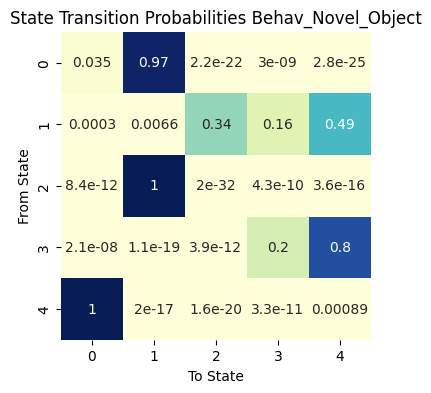

In [21]:
transition_matrix = best_model_X.transmat_
plt.figure(figsize=(4, 4))
sns.heatmap(transition_matrix, annot=True, cmap="YlGnBu", cbar=False)
plt.title('State Transition Probabilities Behav_Novel_Object')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

# Behavior Novel Object

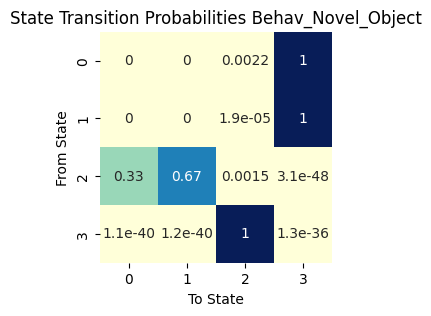

In [11]:
transition_matrix = best_model_BNO.transmat_
plt.figure(figsize=(3, 3))
sns.heatmap(transition_matrix, annot=True, cmap="YlGnBu", cbar=False)
plt.title('State Transition Probabilities Behav_Novel_Object')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

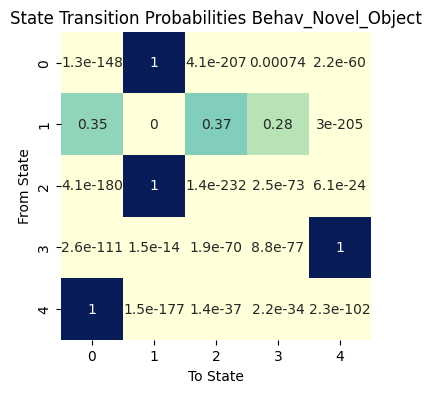

In [13]:
transition_matrix = best_model_BUNO.transmat_
plt.figure(figsize=(4, 4))
sns.heatmap(transition_matrix, annot=True, cmap="YlGnBu", cbar=False)
plt.title('State Transition Probabilities Behav_Novel_Object')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

# Distance

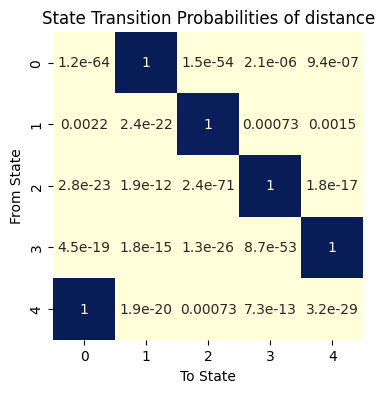

In [14]:
transition_matrix = best_model_D.transmat_
plt.figure(figsize=(4, 4))
sns.heatmap(transition_matrix, annot=True, cmap="YlGnBu", cbar=False)
plt.title('State Transition Probabilities of distance')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

# Ear Position

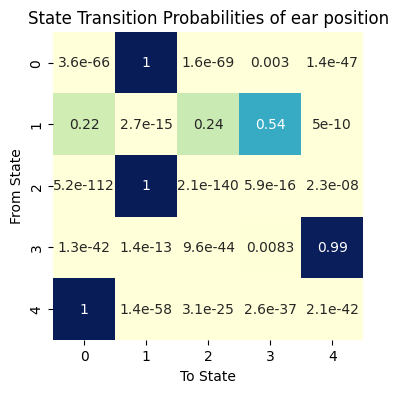

In [15]:
transition_matrix = best_model_EP.transmat_
plt.figure(figsize=(4, 4))
sns.heatmap(transition_matrix, annot=True, cmap="YlGnBu", cbar=False)
plt.title('State Transition Probabilities of ear position')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

# Other Behavior

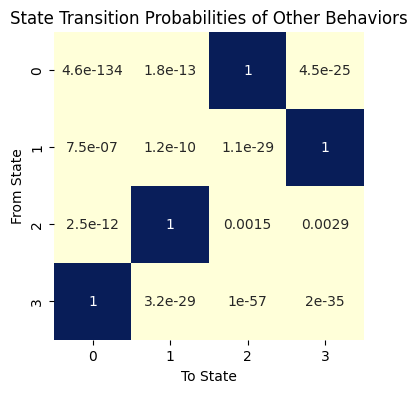

In [16]:
transition_matrix = best_model_OB.transmat_
plt.figure(figsize=(4, 4))
sns.heatmap(transition_matrix, annot=True, cmap="YlGnBu", cbar=False)
plt.title('State Transition Probabilities of Other Behaviors')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

# Rumination

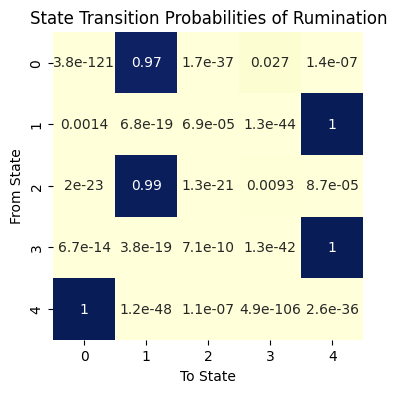

In [17]:
transition_matrix = best_model_R.transmat_
plt.figure(figsize=(4, 4))
sns.heatmap(transition_matrix, annot=True, cmap="YlGnBu", cbar=False)
plt.title('State Transition Probabilities of Rumination')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()